In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [147]:
# import os
# os.chdir("/content/drive/My Drive/Colab Notebooks")
# !ls

data_after_cleaning.csv  Used_Car_Price_Prediction_Part2.ipynb
Question_2.ipynb


In [148]:
# Import required libraries
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from time import perf_counter

In [149]:
pd.set_option('max_columns', 100)

In [150]:
# Load the dataset
dataset = pd.read_csv("data_after_cleaning.csv")

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119418 entries, 0 to 119417
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    119418 non-null  int64  
 1   price         119418 non-null  int64  
 2   year          119418 non-null  float64
 3   model         119418 non-null  object 
 4   condition     83010 non-null   object 
 5   cylinders     94740 non-null   object 
 6   fuel          119418 non-null  object 
 7   odometer      119418 non-null  float64
 8   transmission  119418 non-null  object 
 9   drive         119418 non-null  object 
 10  type          119418 non-null  object 
 11  paint_color   119418 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 10.9+ MB


In [152]:
# Removing unnamed 1st column
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119418 entries, 0 to 119417
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         119418 non-null  int64  
 1   year          119418 non-null  float64
 2   model         119418 non-null  object 
 3   condition     83010 non-null   object 
 4   cylinders     94740 non-null   object 
 5   fuel          119418 non-null  object 
 6   odometer      119418 non-null  float64
 7   transmission  119418 non-null  object 
 8   drive         119418 non-null  object 
 9   type          119418 non-null  object 
 10  paint_color   119418 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.0+ MB


<h2>Data Visualization</h2>

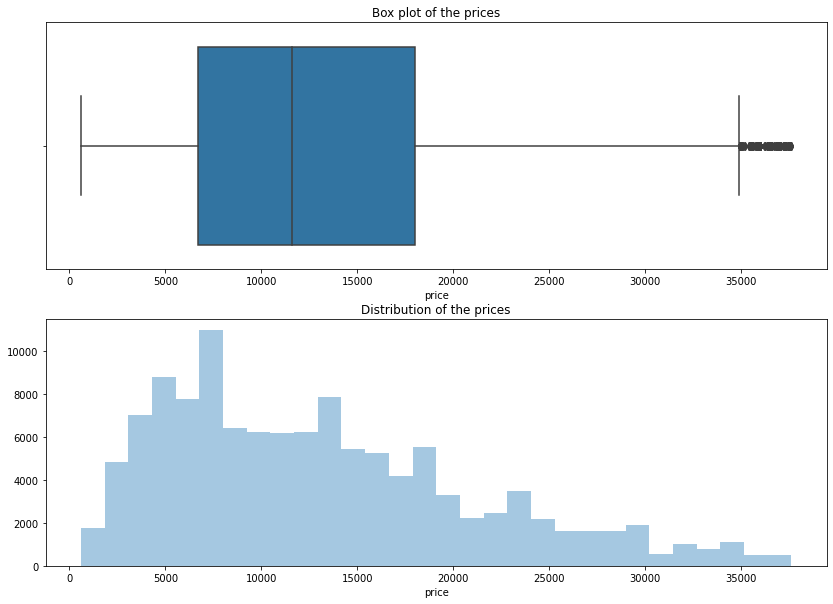

In [154]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].set_title('Box plot of the prices')
sns.boxplot(x='price', data = dataset, ax = axs[0])
axs[1].set_title('Distribution of the prices')
sns.distplot(dataset['price'], ax=axs[1], bins=30, kde=False)

After data cleaning, the distribution of car prices looks better.

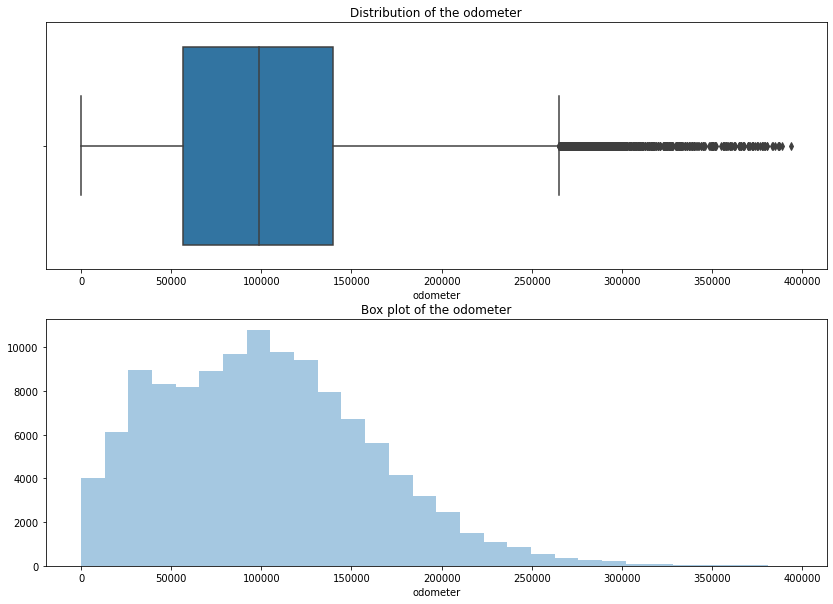

In [155]:
fig, axs = plt.subplots(2, figsize=(14, 10))
axs[0].set_title('Distribution of the odometer')
sns.boxplot(x='odometer', data = dataset, ax=axs[0])
axs[1].set_title('Box plot of the odometer')
sns.distplot(dataset['odometer'], ax = axs[1], bins=30, kde=False)

In [156]:
dataset['paint_color'].value_counts()

white     29004
black     23726
silver    18709
grey      13488
blue      12137
red       11412
custom     3829
green      2973
brown      2626
orange      637
yellow      612
purple      265
Name: paint_color, dtype: int64

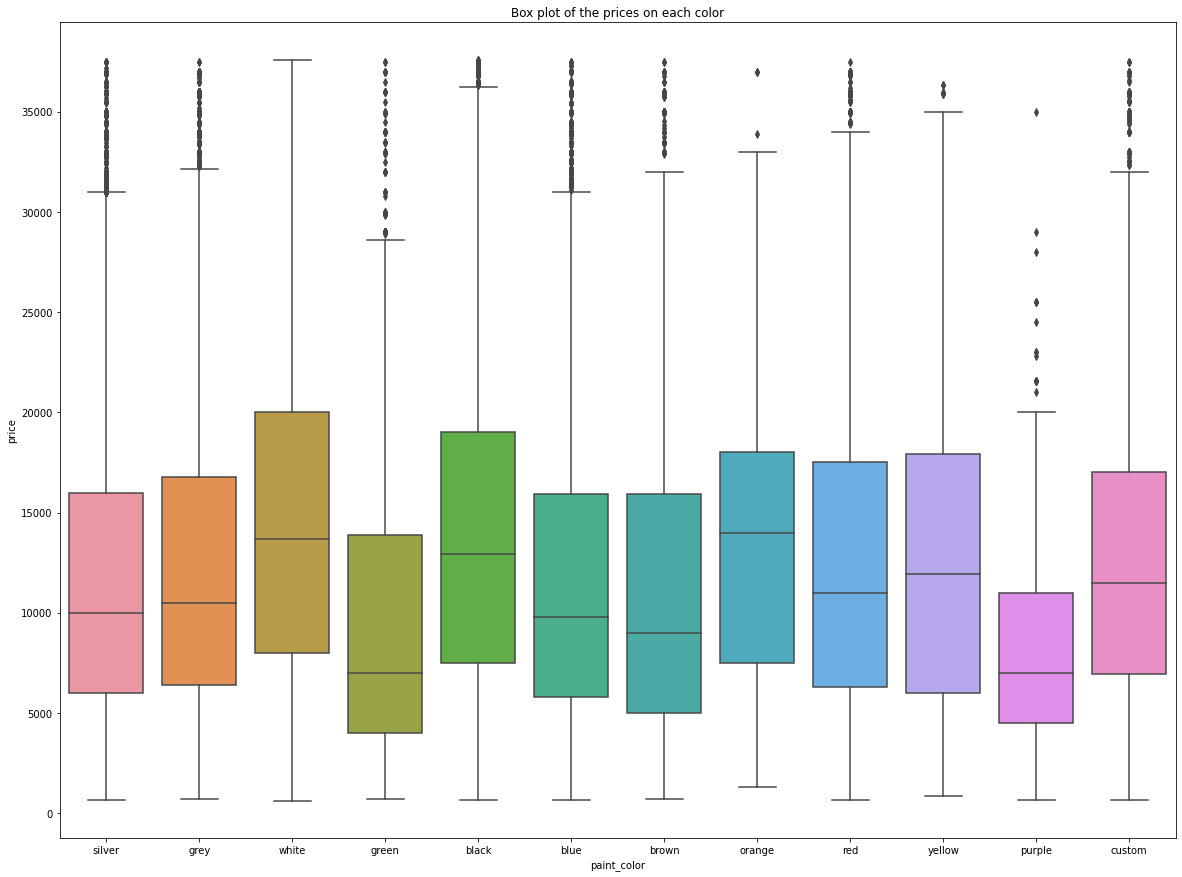

In [157]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Box plot of the prices on each color')
sns.boxplot(x='paint_color', y='price', data = dataset)

In [158]:
dataset['type'].value_counts()

SUV            32667
sedan          32205
truck          15453
pickup         15229
coupe           5197
hatchback       4173
wagon           4104
van             3090
mini-van        2559
other           2436
convertible     2009
offroad          237
bus               59
Name: type, dtype: int64

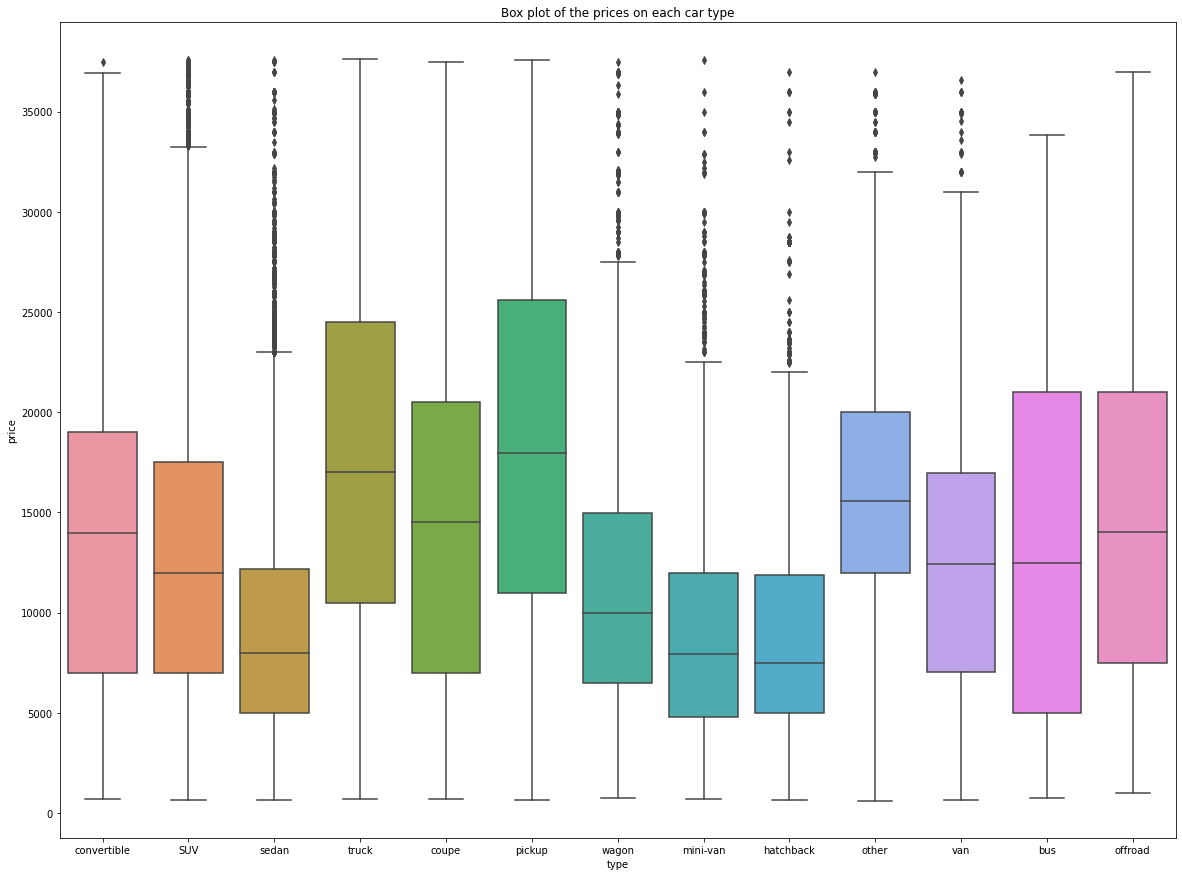

In [159]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Box plot of the prices on each car type')
sns.boxplot(x='type', y='price', data = dataset)

In [160]:
# Changing categorical values other to include its respective feature name
dataset["cylinders"].replace({"other":"other_cylinders"}, inplace=True)
dataset["fuel"].replace({"other":"other_fuel"}, inplace=True)
dataset["transmission"].replace({"other":"other_transmission"}, inplace=True)
# df.drop(df.index[df['cylinders'] == "other"], inplace = True)

In [161]:
print(dataset['condition'].value_counts())
print('\n')
print(dataset['cylinders'].value_counts())
print('\n')
print(dataset['fuel'].value_counts())
print('\n')
print(dataset['transmission'].value_counts())
print('\n')
print(dataset['drive'].value_counts())
print('\n')

excellent    39665
good         33088
like new      8005
fair          1859
new            236
salvage        157
Name: condition, dtype: int64


4 cylinders        35288
6 cylinders        32045
8 cylinders        25871
5 cylinders          771
10 cylinders         397
other_cylinders      227
3 cylinders          137
12 cylinders           4
Name: cylinders, dtype: int64


gas           107496
diesel          7482
other_fuel      3044
hybrid          1252
electric         144
Name: fuel, dtype: int64


automatic             108696
manual                  6036
other_transmission      4686
Name: transmission, dtype: int64


4wd    51582
fwd    48619
rwd    19217
Name: drive, dtype: int64




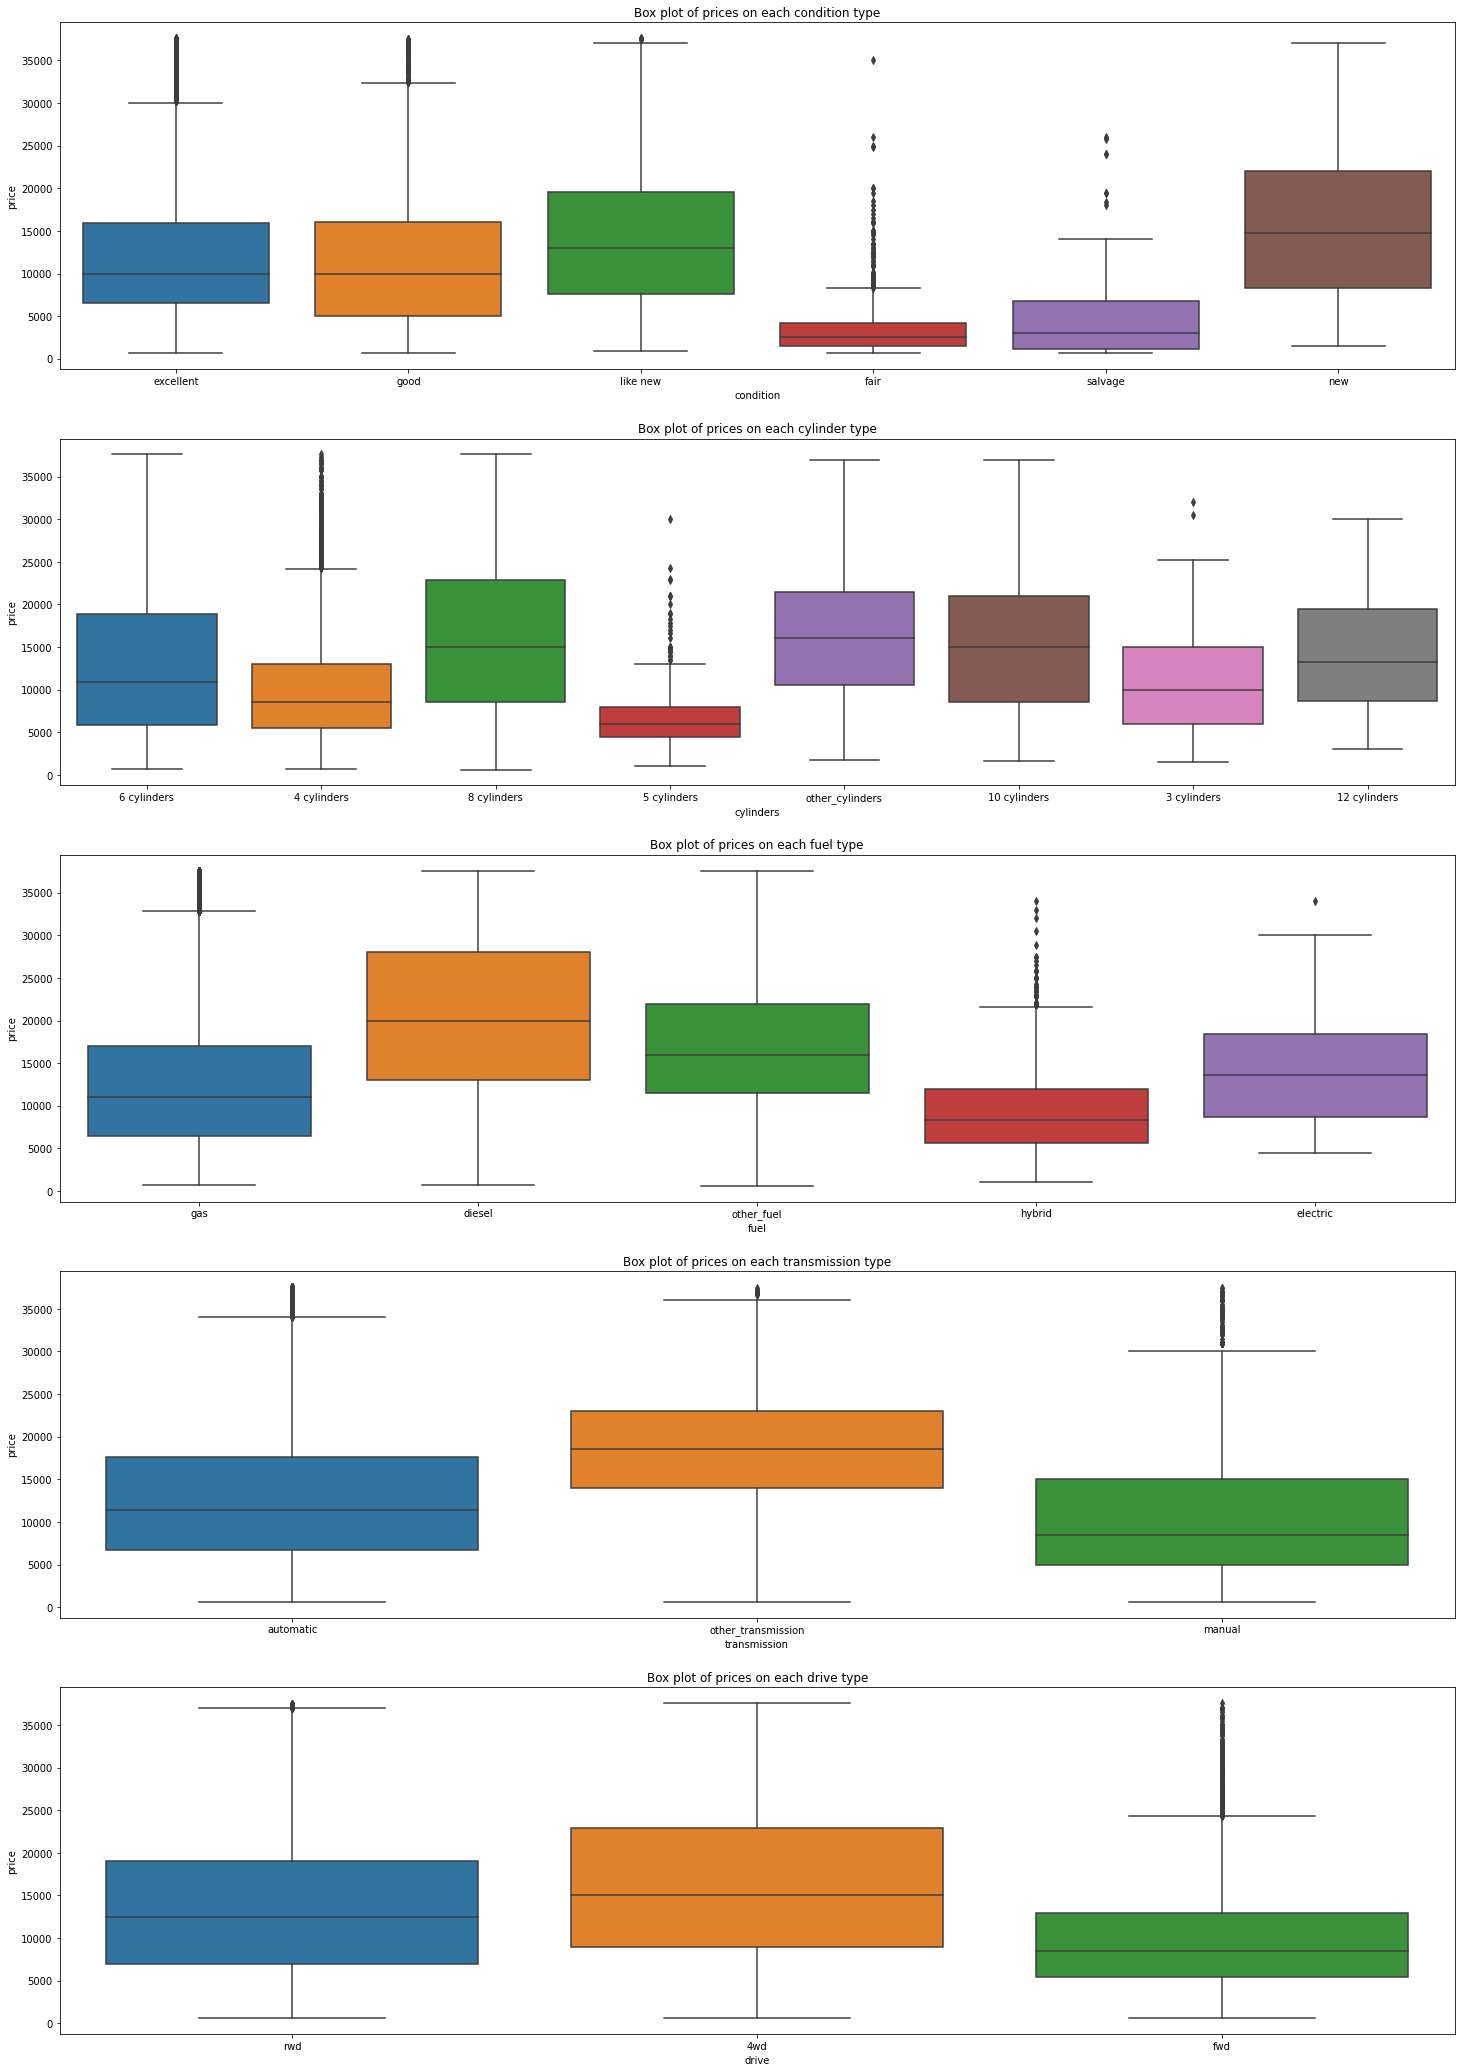

In [162]:
fig, axs = plt.subplots(5, figsize=(25, 37))
axs[0].set_title('Box plot of prices on each condition type')
sns.boxplot(x='condition', y='price', data = dataset, ax=axs[0])
axs[1].set_title('Box plot of prices on each cylinder type')
sns.boxplot(x='cylinders', y='price', data = dataset, ax=axs[1])
axs[2].set_title('Box plot of prices on each fuel type')
sns.boxplot(x='fuel', y='price', data = dataset, ax=axs[2])
axs[3].set_title('Box plot of prices on each transmission type')
sns.boxplot(x='transmission', y='price', data = dataset, ax=axs[3])
axs[4].set_title('Box plot of prices on each drive type')
sns.boxplot(x='drive', y='price', data = dataset, ax=axs[4])

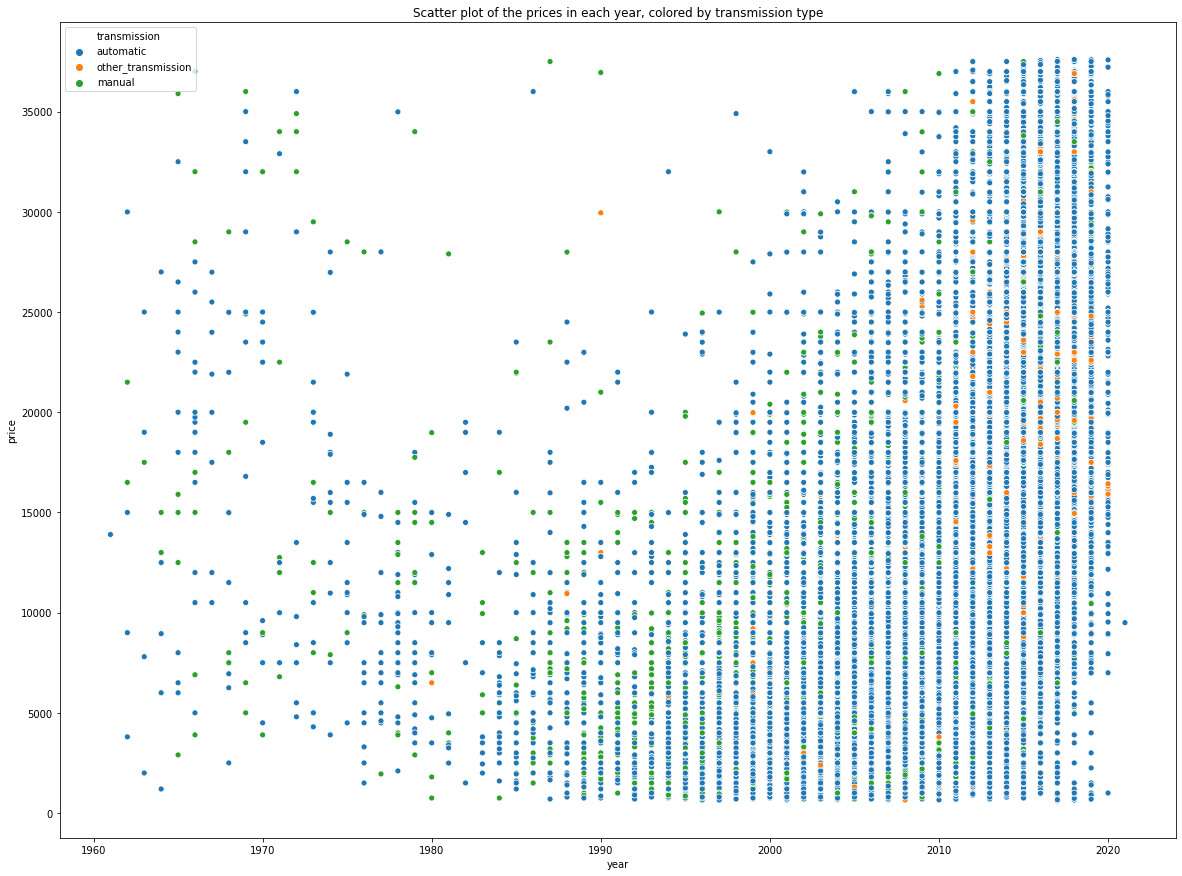

In [163]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by transmission type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'transmission')

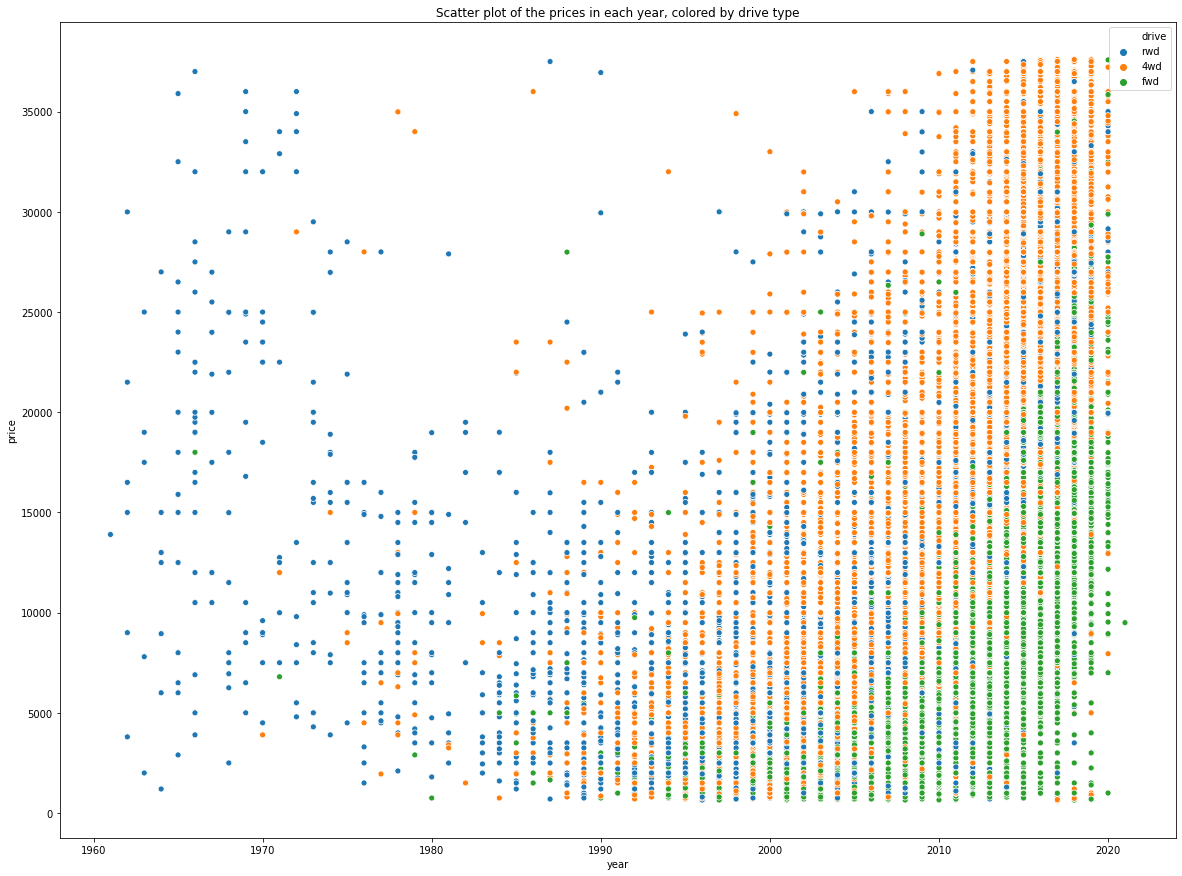

In [164]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by drive type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'drive')

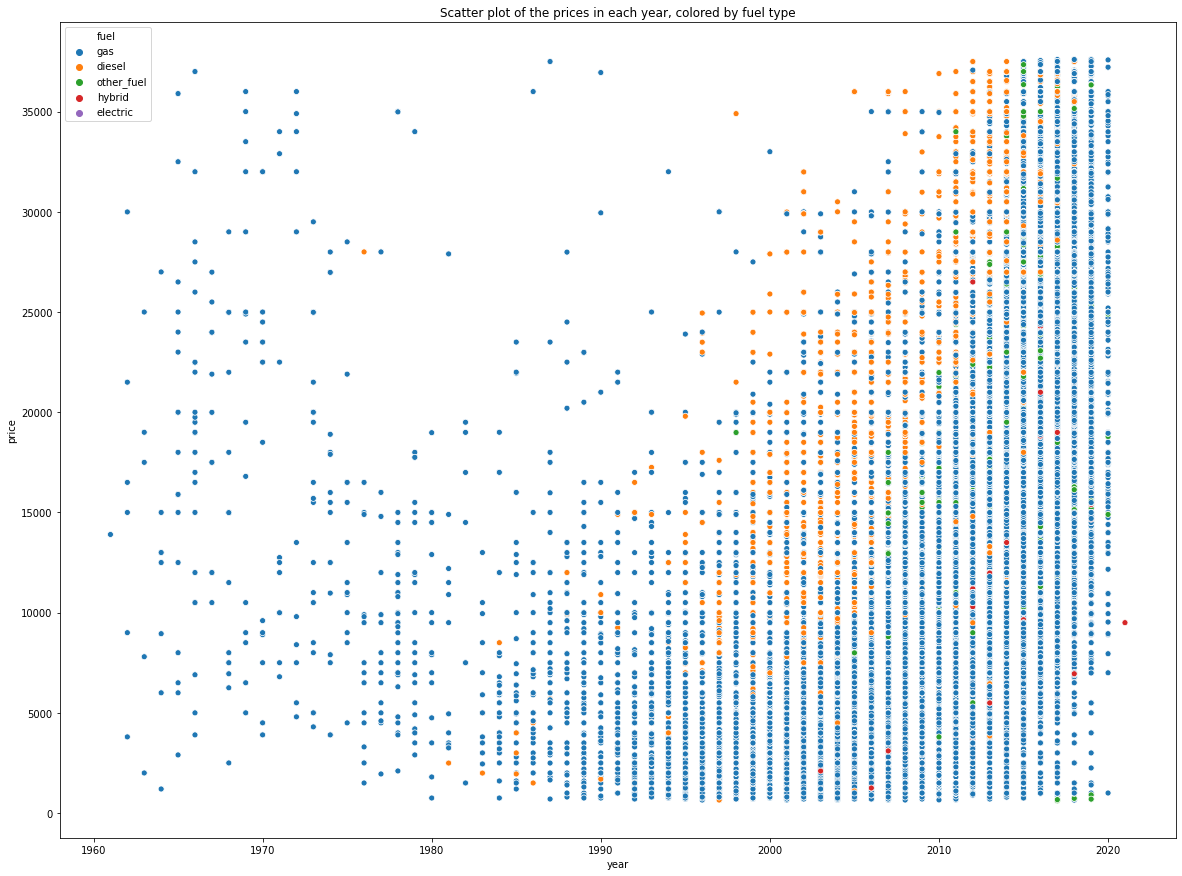

In [165]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by fuel type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'fuel')

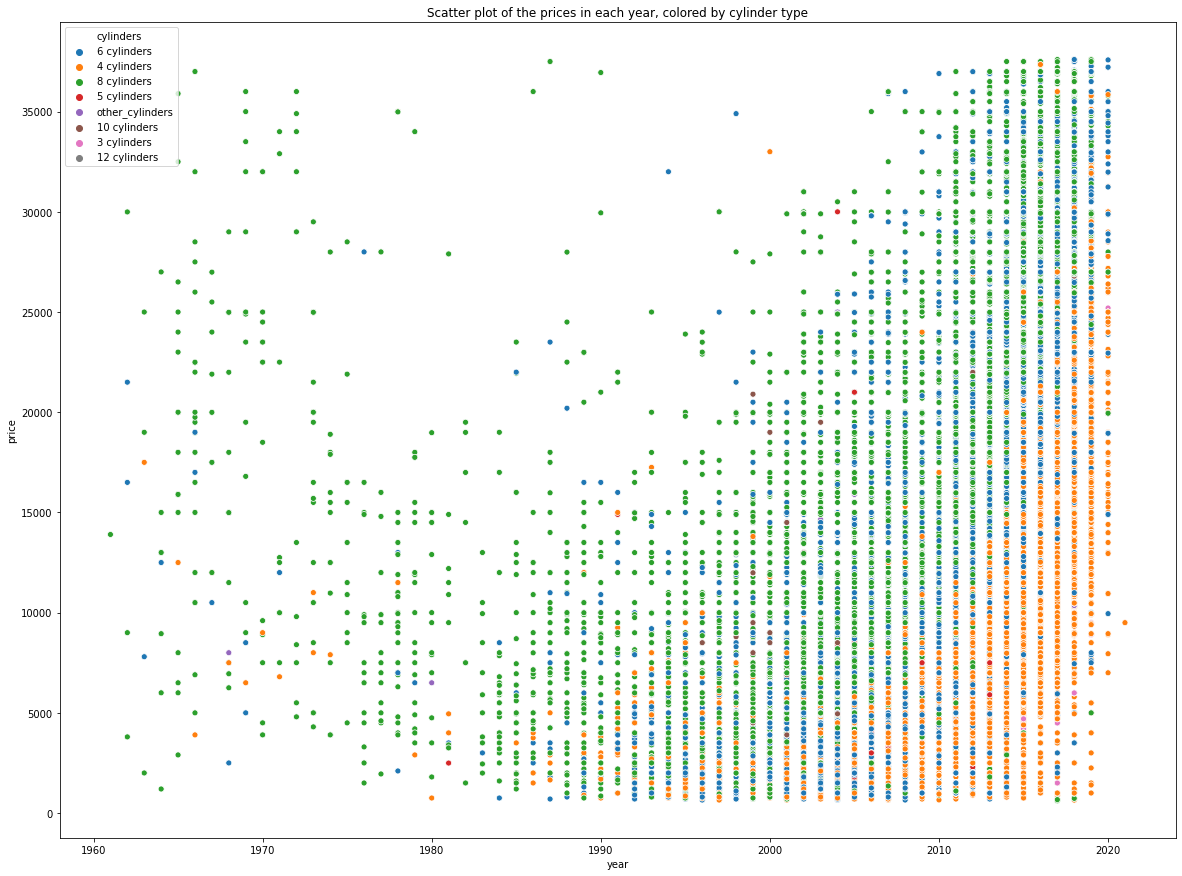

In [166]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the prices in each year, colored by cylinder type')
sns.scatterplot(x='year', y='price', data=dataset, hue = 'cylinders')

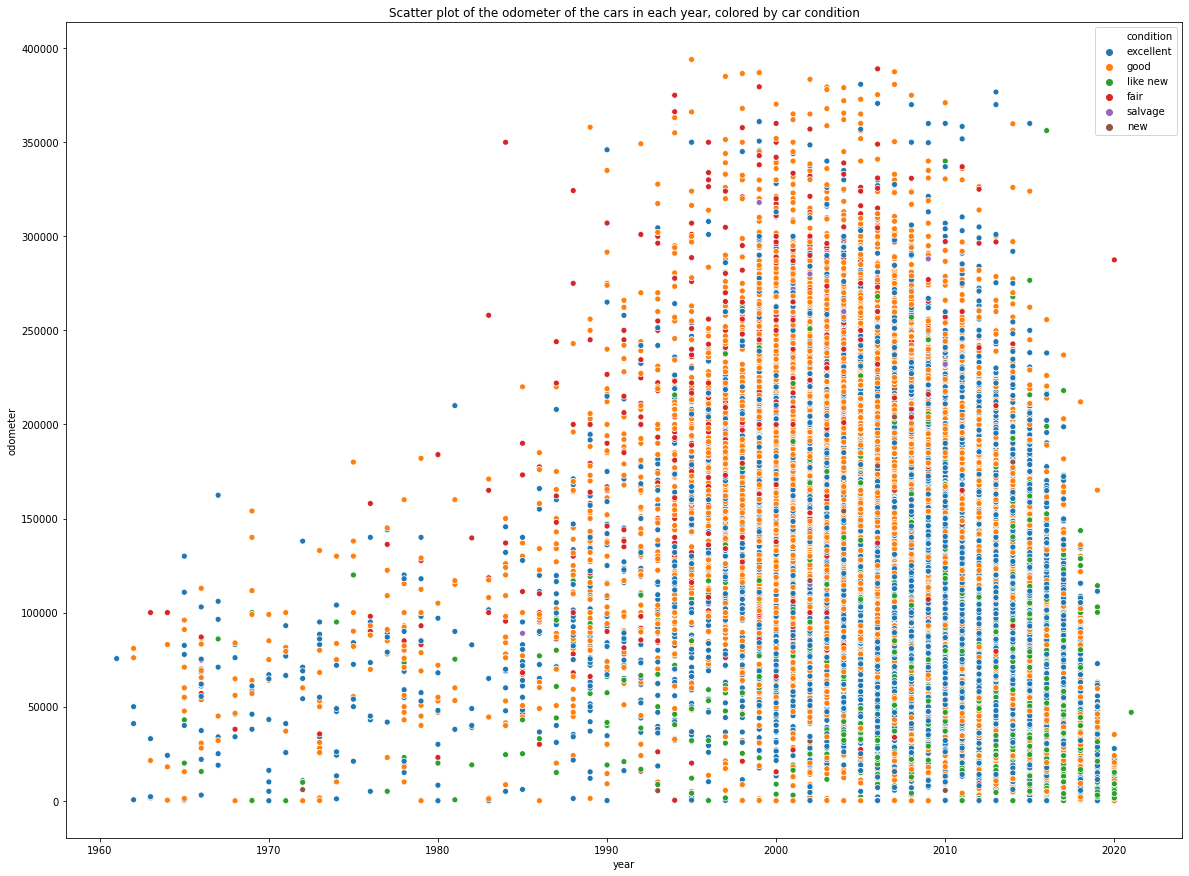

In [167]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot of the odometer of the cars in each year, colored by car condition')
sns.scatterplot(x='year', y='odometer', data=dataset, hue = 'condition')

In [168]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119418 entries, 0 to 119417
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         119418 non-null  int64  
 1   year          119418 non-null  float64
 2   model         119418 non-null  object 
 3   condition     83010 non-null   object 
 4   cylinders     94740 non-null   object 
 5   fuel          119418 non-null  object 
 6   odometer      119418 non-null  float64
 7   transmission  119418 non-null  object 
 8   drive         119418 non-null  object 
 9   type          119418 non-null  object 
 10  paint_color   119418 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.0+ MB


In [169]:
# Find all the non-numerical features
temp_features = dataset.columns.values.tolist()
features = []
for column_name in temp_features:
    if dataset[column_name].dtype == 'object':
        features.append(column_name)
print(features)

['model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color']


In [170]:
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

# do label encoding
# # Converting from strings to numerics
# for column in features:
#     if dataset[column].dtype == 'object':
#         le = LabelEncoder()
#         le.fit(list(dataset[column].astype(str).values))
#         dataset[column] = le.transform(list(dataset[column].astype(str).values))

# do one hot encoding
for column in features:
    column = pd.get_dummies(dataset[column], drop_first=True)
    dataset = pd.concat([dataset,column],axis=1)
dataset = dataset.drop(columns = features)

In [171]:
dataset.head()

,price,year,odometer,1500,1500 4x4,1500 big horn,1500 crew cab,1500 quad cab,1500 slt,1500 sport 4x4 1/2 ton,200,2500,2500 4x4,2500 crew cab,2500 slt,3,3 series,3 series 328i convertible 2d,3-series,300,325i,328,328i,328xi,335i,3500,350z,370z coupe 2d,4 series 428i coupe 2d,4-runner,4500,4runner,4runner limited,4runner sr5,4runner sr5 4x4 gas suv,5 series,5-series,500,528i,535i,5500,6,7 series,HUMMER H2,HUMMER H3,International 4300,Isuzu NPR,Isuzu NPR HD,Porsche Cayenne,Scion tC,...,yaris,yukon,yukon denali,yukon slt,yukon xl,yukon xl denali,z4,fair,good,like new,new,salvage,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other_cylinders,electric,gas,hybrid,other_fuel,manual,other_transmission,fwd,rwd,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
0,8500,2005.0,62800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24930,2017.0,32989.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13499,2015.0,67257.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3450,2000.0,198200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,17998,2014.0,73864.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [172]:
std_scaler = StandardScaler()

for column in ['year', 'odometer']:
    dataset[column] = std_scaler.fit_transform(dataset[column].values.reshape(-1,1))

In [173]:
dataset.head()

,price,year,odometer,1500,1500 4x4,1500 big horn,1500 crew cab,1500 quad cab,1500 slt,1500 sport 4x4 1/2 ton,200,2500,2500 4x4,2500 crew cab,2500 slt,3,3 series,3 series 328i convertible 2d,3-series,300,325i,328,328i,328xi,335i,3500,350z,370z coupe 2d,4 series 428i coupe 2d,4-runner,4500,4runner,4runner limited,4runner sr5,4runner sr5 4x4 gas suv,5 series,5-series,500,528i,535i,5500,6,7 series,HUMMER H2,HUMMER H3,International 4300,Isuzu NPR,Isuzu NPR HD,Porsche Cayenne,Scion tC,...,yaris,yukon,yukon denali,yukon slt,yukon xl,yukon xl denali,z4,fair,good,like new,new,salvage,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other_cylinders,electric,gas,hybrid,other_fuel,manual,other_transmission,fwd,rwd,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
0,8500,-1.109058,-0.676221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24930,1.015112,-1.183704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,13499,0.661084,-0.600348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3450,-1.994128,1.628743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,17998,0.484070,-0.487874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [174]:
# Shuffle dataframe
dataset = dataset.sample(frac=1, random_state=1)
dataset.head(5)

,price,year,odometer,1500,1500 4x4,1500 big horn,1500 crew cab,1500 quad cab,1500 slt,1500 sport 4x4 1/2 ton,200,2500,2500 4x4,2500 crew cab,2500 slt,3,3 series,3 series 328i convertible 2d,3-series,300,325i,328,328i,328xi,335i,3500,350z,370z coupe 2d,4 series 428i coupe 2d,4-runner,4500,4runner,4runner limited,4runner sr5,4runner sr5 4x4 gas suv,5 series,5-series,500,528i,535i,5500,6,7 series,HUMMER H2,HUMMER H3,International 4300,Isuzu NPR,Isuzu NPR HD,Porsche Cayenne,Scion tC,...,yaris,yukon,yukon denali,yukon slt,yukon xl,yukon xl denali,z4,fair,good,like new,new,salvage,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other_cylinders,electric,gas,hybrid,other_fuel,manual,other_transmission,fwd,rwd,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,van,wagon,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
106417,20955,1.015112,0.209301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21863,15995,1.015112,-1.202090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
59511,14588,0.307055,0.471954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1563,15995,-0.223987,0.731969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68268,8950,0.484070,-0.076437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [175]:
# Separating price column from dataset
target_column_name = 'price'
y = dataset[target_column_name]
x = dataset.drop([target_column_name], axis=1)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(95534, 606) (23884, 606) (95534,) (23884,)


In [178]:
model_score = pd.DataFrame(columns=('r2', 'rmse', 'train_in_sec', 'test_in_sec'))

<h2>1) Linear Regression</h2>

In [179]:
lr = LinearRegression()
start = perf_counter()
lr.fit(x_train, y_train)
end = perf_counter()
lr_train = end - start

In [180]:
start = perf_counter()
lr_y_pred = lr.predict(x_test)
end = perf_counter()
lr_test = end - start

lr_r2 = metrics.r2_score(y_test, lr_y_pred)
lr_rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))

model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'rmse':[lr_rmse], 'train_in_sec':[lr_train], 'test_in_sec':[lr_test] }, index = ['Linear Regression']))
print(model_score)

                         r2        rmse  train_in_sec  test_in_sec
Linear Regression  0.775732  3857.37388      4.930688     0.038749


<h2>2) Decision Tree</h2>

In [181]:
dt_model = DecisionTreeRegressor(random_state=0)
start = perf_counter()
dt_model.fit(x_train, y_train)
end = perf_counter()
dt_train = end - start

In [182]:
start = perf_counter()
dt_y_pred = dt_model.predict(x_test)
end = perf_counter()
dt_test = end - start

dt_r2 = metrics.r2_score(y_test, dt_y_pred)
dt_rmse = math.sqrt(metrics.mean_squared_error(y_test, dt_y_pred))

model_score = model_score.append(pd.DataFrame({'r2':[dt_r2], 'rmse':[dt_rmse], 'train_in_sec':[dt_train], 'test_in_sec':[dt_test]}, index = ['Decision Tree']))
print(model_score)

                         r2         rmse  train_in_sec  test_in_sec
Linear Regression  0.775732  3857.373880      4.930688     0.038749
Decision Tree      0.859083  3057.660917      5.003013     0.062570


<h2>3) K-Nearest Neighbor</h2>

In [39]:
# knn = KNeighborsRegressor()

# param_grid = [
#      {
#          'weights':['uniform'],
#          'n_neighbors':[i for i in range(1,7)]
#      }]

# grid_search_knn = GridSearchCV(knn, param_grid, n_jobs=-1, verbose=2)
# grid_search_knn.fit(x_train, y_train) 

In [40]:
# knn_best = grid_search_knn.best_estimator_
# knn_best

In [41]:
# knn_y_pred = knn_best.predict(x_test)
# knn_r2 = metrics.r2_score(y_test, knn_y_pred)
# knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))

# model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_rmse]}, index = ['K - Nearest Neighbor']))

In [183]:
# Using neighbors 4
knn = KNeighborsRegressor(n_neighbors = 4)
start = perf_counter()
knn.fit(x_train, y_train)
end = perf_counter()
knn_train = end - start

start = perf_counter()
knn_y_pred = knn.predict(x_test)
end = perf_counter()
knn_test = end - start

knn_r2 = metrics.r2_score(y_test, knn_y_pred)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))

In [184]:
model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_rmse], 'train_in_sec':[knn_train], 'test_in_sec':[knn_test]}, index = ['K - Nearest Neighbor']))
print(model_score)

                            r2         rmse  train_in_sec  test_in_sec
Linear Regression     0.775732  3857.373880      4.930688     0.038749
Decision Tree         0.859083  3057.660917      5.003013     0.062570
K - Nearest Neighbor  0.869009  2948.004167     14.743936   627.180658


<h2>4) LinearSVR</h2>

In [185]:
# Support vector regression
from sklearn.svm import LinearSVR
svr_linear = LinearSVR(random_state=42, tol=1e-5)

start = perf_counter()
svr_linear.fit(x_train, y_train)
end = perf_counter()
svr_linear_train = end - start

In [186]:
start = perf_counter()
svrLinear_y_pred = svr_linear.predict(x_test)
end = perf_counter()
svr_linear_test = end - start

svrLinear_r2 = metrics.r2_score(y_test, svrLinear_y_pred)
svrLinear_rmse = math.sqrt(metrics.mean_squared_error(y_test, svrLinear_y_pred))
print(svrLinear_r2, svrLinear_rmse)

0.5467952611552362 5483.464014597247


In [187]:
model_score = model_score.append(pd.DataFrame({'r2':[svrLinear_r2], 'rmse':[svrLinear_rmse], 'train_in_sec':[svr_linear_train], 'test_in_sec':[svr_linear_test]}, index = ['LinearSVR']))

<h2>5) SGDRegressor</h2>

In [188]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(random_state=42)
start = perf_counter()
sgd_regressor.fit(x_train, y_train)
end = perf_counter()
sgdr_train = end - start

In [189]:
start = perf_counter()
sgd_regressor_y_pred = svr_linear.predict(x_test)
end = perf_counter()
sgdr_test = end - start
sgd_regressor_r2 = metrics.r2_score(y_test, sgd_regressor_y_pred)
sgd_regressor_rmse = math.sqrt(metrics.mean_squared_error(y_test, sgd_regressor_y_pred))
print(sgd_regressor_r2, sgd_regressor_rmse)

0.5467952611552362 5483.464014597247


In [190]:
model_score = model_score.append(pd.DataFrame({'r2':[sgd_regressor_r2], 'rmse':[sgd_regressor_rmse], 'train_in_sec':[sgdr_train], 'test_in_sec':[sgdr_test]}, index = ['SGDRegressor']))

In [191]:
model_score

,r2,rmse,train_in_sec,test_in_sec
Linear Regression,0.775732,3857.373880,4.930688,0.038749
Decision Tree,0.859083,3057.660917,5.003013,0.062570
K - Nearest Neighbor,0.869009,2948.004167,14.743936,627.180658
LinearSVR,0.546795,5483.464015,0.744154,0.197967
SGDRegressor,0.546795,5483.464015,40.530021,0.029898


## **Ensemble Models**

<h2>1) Weighted Average</h2>

In [192]:
# weighted average ensemble : Picking top 3 linear models
en_weighted_average_y_pred = ((lr_y_pred * 0.2) + (dt_y_pred * 0.4) + (knn_y_pred)* 0.4)
en_weighted_average_r2 = math.sqrt(metrics.r2_score(y_test, en_weighted_average_y_pred))
en_weighted_average_rmse = math.sqrt(metrics.mean_squared_error(y_test, en_weighted_average_y_pred))
print(en_weighted_average_r2, en_weighted_average_rmse)

0.9494427281309328 2557.1419234147734


In [193]:
model_score = model_score.append(pd.DataFrame({'r2':[en_weighted_average_r2], 'rmse':[en_weighted_average_rmse]}, index = ['En - Weighted Average']))

In [78]:
# model_score.drop("Random Forest", axis=0, inplace=True)

<h2>2) Random Forest</h2>

In [194]:
rf = RandomForestRegressor(max_depth=30, random_state=0)
start = perf_counter()
rf.fit(x_train, y_train)
end = perf_counter()
rf_train = end - start

In [195]:
start = perf_counter()
rf_y_pred = rf.predict(x_test)
end = perf_counter()
rf_test = end - start

rf_r2 = metrics.r2_score(y_test, rf_y_pred)
rf_rmse = math.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))
print(rf_r2, rf_rmse)

0.9065133901239043 2490.4766952602904


In [196]:
model_score = model_score.append(pd.DataFrame({'r2':[rf_r2], 'rmse':[rf_rmse], 'train_in_sec':[rf_train], 'test_in_sec':[rf_test]}, index = ['En - Random Forest']))

<h2>3) LGBM</h2>

In [197]:
# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
# https://github.com/chetanambi/Predicting-The-Costs-Of-Used-Cars-Hackathon-By-Imarticus-Learning/blob/master/Predict%20the%20Cost%20of%20Used%20Cars.ipynb
# https://www.kaggle.com/vbmokin/used-cars-fe-eda-with-3d-abnormals-filter
# https://www.kaggle.com/vbmokin/used-cars-price-prediction-by-15-models
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

import lightgbm as lgb
lgbm_train_data = lgb.Dataset(x_train, label=y_train)
lgbm_test_data = lgb.Dataset(x_test, label=y_test)

lgbm_params = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         'seed':0
         }

start = perf_counter()
lgbm = lgb.train(params=lgbm_params,
                 verbose_eval=100,
                 num_boost_round=10000,
                 early_stopping_rounds=100,
                 train_set=lgbm_train_data,
                 valid_sets=[lgbm_test_data])
end = perf_counter()
lgbm_train = end - start

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 3037.52
[200]	valid_0's rmse: 2779.88
[300]	valid_0's rmse: 2676.82
[400]	valid_0's rmse: 2610.6
[500]	valid_0's rmse: 2559.59
[600]	valid_0's rmse: 2521.03
[700]	valid_0's rmse: 2491.96
[800]	valid_0's rmse: 2464.02
[900]	valid_0's rmse: 2443.78
[1000]	valid_0's rmse: 2423.5
[1100]	valid_0's rmse: 2406.09
[1200]	valid_0's rmse: 2391.26
[1300]	valid_0's rmse: 2379.75
[1400]	valid_0's rmse: 2368.28
[1500]	valid_0's rmse: 2356.59
[1600]	valid_0's rmse: 2347.92
[1700]	valid_0's rmse: 2339.34
[1800]	valid_0's rmse: 2331.09
[1900]	valid_0's rmse: 2325.13
[2000]	valid_0's rmse: 2318.06
[2100]	valid_0's rmse: 2313.07
[2200]	valid_0's rmse: 2308.2
[2300]	valid_0's rmse: 2302.97
[2400]	valid_0's rmse: 2297.11
[2500]	valid_0's rmse: 2293.62
[2600]	valid_0's rmse: 2289.8
[2700]	valid_0's rmse: 2286.86
[2800]	valid_0's rmse: 2283.53
[2900]	valid_0's rmse: 2280.5
[3000]	valid_0's rmse: 2278.29
[3100]	valid_0's rmse

In [198]:
start = perf_counter()
lgbm_y_pred = lgbm.predict(x_test)
end = perf_counter()
lgbm_test = end - start

lgbm_r2 = metrics.r2_score(y_test, lgbm_y_pred)
lgbm_rmse = math.sqrt(metrics.mean_squared_error(y_test, lgbm_y_pred))
print(lgbm_r2, lgbm_rmse)

0.9233260508059057 2255.4421532657393


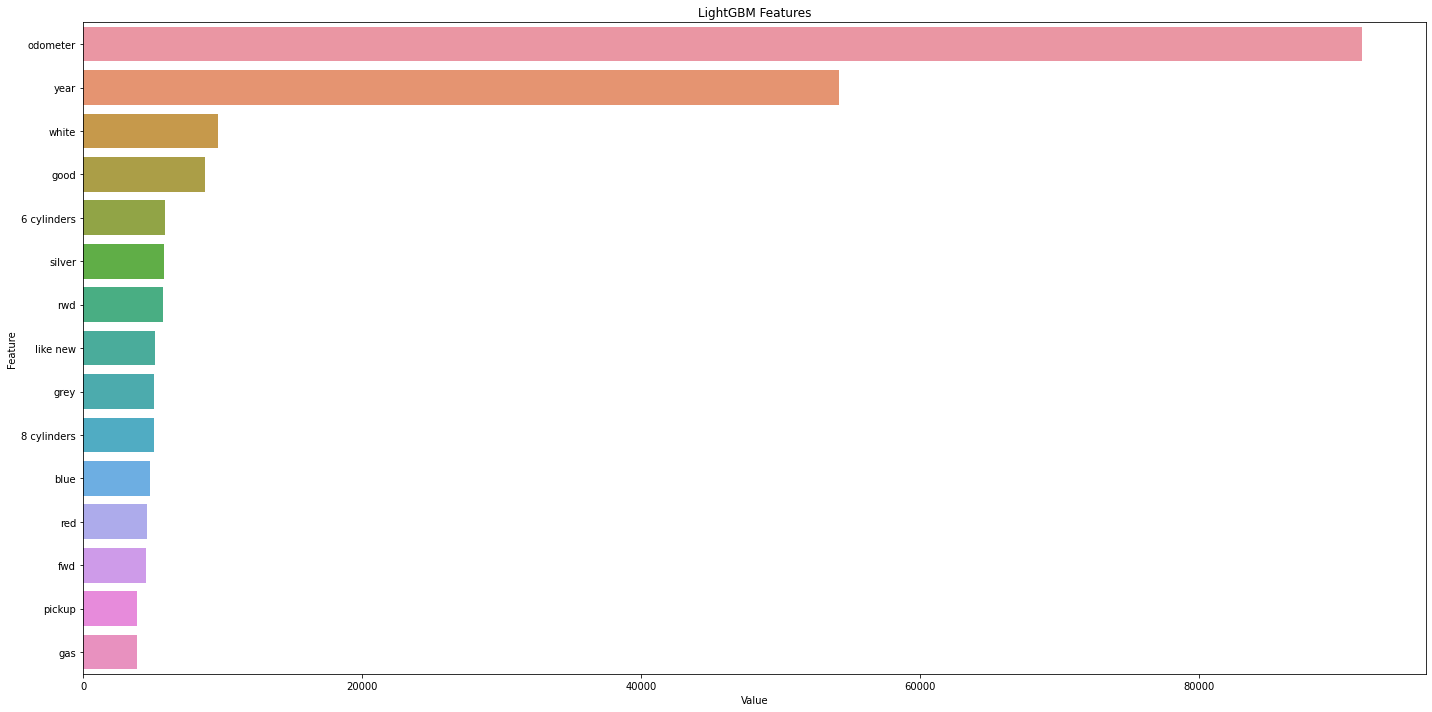

In [199]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), x_train.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [200]:
model_score = model_score.append(pd.DataFrame({'r2':[lgbm_r2], 'rmse':[lgbm_rmse], 'train_in_sec':[lgbm_train], 'test_in_sec':[lgbm_test]}, index = ['En - LGBM']))
print(model_score)

                             r2         rmse  train_in_sec  test_in_sec
Linear Regression      0.775732  3857.373880      4.930688     0.038749
Decision Tree          0.859083  3057.660917      5.003013     0.062570
K - Nearest Neighbor   0.869009  2948.004167     14.743936   627.180658
LinearSVR              0.546795  5483.464015      0.744154     0.197967
SGDRegressor           0.546795  5483.464015     40.530021     0.029898
En - Weighted Average  0.949443  2557.141923           NaN          NaN
En - Random Forest     0.906513  2490.476695    258.844972     1.134756
En - LGBM              0.923326  2255.442153     79.282677    18.240019


<h2>4) BaggingRegressor</h2>

In [201]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
bagging_reg = BaggingRegressor(tree.DecisionTreeRegressor(random_state=42))
start = perf_counter()
bagging_reg.fit(x_train, y_train)
end = perf_counter()
bagging_train = end - start

In [202]:
start = perf_counter()
bagging_reg_y_pred = bagging_reg.predict(x_test)
end = perf_counter()
bagging_test = end - start

bagging_reg_r2 = metrics.r2_score(y_test, bagging_reg_y_pred)
bagging_reg_rmse = math.sqrt(metrics.mean_squared_error(y_test, bagging_reg_y_pred))
print(bagging_reg_r2, bagging_reg_rmse)

0.9049758765062466 2510.8728040424853


In [203]:
model_score = model_score.append(pd.DataFrame({'r2':[bagging_reg_r2], 'rmse':[bagging_reg_rmse], 'train_in_sec':[bagging_train], 'test_in_sec':[bagging_test]}, index = ['En - BaggingRegressor']))
print(model_score)

                             r2         rmse  train_in_sec  test_in_sec
Linear Regression      0.775732  3857.373880      4.930688     0.038749
Decision Tree          0.859083  3057.660917      5.003013     0.062570
K - Nearest Neighbor   0.869009  2948.004167     14.743936   627.180658
LinearSVR              0.546795  5483.464015      0.744154     0.197967
SGDRegressor           0.546795  5483.464015     40.530021     0.029898
En - Weighted Average  0.949443  2557.141923           NaN          NaN
En - Random Forest     0.906513  2490.476695    258.844972     1.134756
En - LGBM              0.923326  2255.442153     79.282677    18.240019
En - BaggingRegressor  0.904976  2510.872804     31.102498     0.490239


<h2>5) AdaBoostRegressor</h2>

In [204]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=30),random_state=0)
start = perf_counter()
adaboost_model.fit(x_train, y_train)
end = perf_counter()
ada_train = end - start

In [205]:
start = perf_counter()
adaboost_y_pred = adaboost_model.predict(x_test)
end = perf_counter()
ada_test = end - start

adaboost_reg_r2 = metrics.r2_score(y_test, adaboost_y_pred)
adaboost_reg_rmse = math.sqrt(metrics.mean_squared_error(y_test, adaboost_y_pred))
print(adaboost_reg_r2, adaboost_reg_rmse)

0.9002580610372476 2572.448445761149


In [206]:
model_score = model_score.append(pd.DataFrame({'r2':[adaboost_reg_r2], 'rmse':[adaboost_reg_rmse], 'train_in_sec':[ada_train], 'test_in_sec':[ada_test]}, index = ['En - AdaBoost']))
print(model_score)

                             r2         rmse  train_in_sec  test_in_sec
Linear Regression      0.775732  3857.373880      4.930688     0.038749
Decision Tree          0.859083  3057.660917      5.003013     0.062570
K - Nearest Neighbor   0.869009  2948.004167     14.743936   627.180658
LinearSVR              0.546795  5483.464015      0.744154     0.197967
SGDRegressor           0.546795  5483.464015     40.530021     0.029898
En - Weighted Average  0.949443  2557.141923           NaN          NaN
En - Random Forest     0.906513  2490.476695    258.844972     1.134756
En - LGBM              0.923326  2255.442153     79.282677    18.240019
En - BaggingRegressor  0.904976  2510.872804     31.102498     0.490239
En - AdaBoost          0.900258  2572.448446    175.173812     1.360349


<h2> 6) XGBoost </h2>

In [207]:
import xgboost as xgb
xgb_train = xgb.DMatrix(x_train, label=y_train)
xgb_test = xgb.DMatrix(x_test, label=y_test)

In [208]:
# xgb_params = \
# {'colsample_bytree': 1.0,
#  'eta': 0.01,
#  'eval_metric': 'rmse',
#  'max_depth': 10,
#  'min_child_weight': 6,
#  'objective': 'reg:linear',
#  'subsample': 0.8}
xgb_params = {'max_depth': 20}

In [209]:
start = perf_counter()
xgb_model = xgb.train(
    xgb_params,
    xgb_train,
    num_boost_round=100,
    evals=[(xgb_test, "Test")],
    early_stopping_rounds=10
)
end = perf_counter()
xgbm_train = end - start

[0]	Test-rmse:11118.8
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:8124.23
[2]	Test-rmse:6091.41
[3]	Test-rmse:4741.58
[4]	Test-rmse:3868.8
[5]	Test-rmse:3326.79
[6]	Test-rmse:3010.32
[7]	Test-rmse:2830.36
[8]	Test-rmse:2715.68
[9]	Test-rmse:2650.56
[10]	Test-rmse:2614.93
[11]	Test-rmse:2588.44
[12]	Test-rmse:2571.53
[13]	Test-rmse:2558.89
[14]	Test-rmse:2551.87
[15]	Test-rmse:2545.05
[16]	Test-rmse:2539.98
[17]	Test-rmse:2535.31
[18]	Test-rmse:2532.61
[19]	Test-rmse:2524.74
[20]	Test-rmse:2520.86
[21]	Test-rmse:2516.64
[22]	Test-rmse:2514.34
[23]	Test-rmse:2512
[24]	Test-rmse:2507.92
[25]	Test-rmse:2505.63
[26]	Test-rmse:2502.16
[27]	Test-rmse:2500.22
[28]	Test-rmse:2497.58
[29]	Test-rmse:2494.98
[30]	Test-rmse:2493.04
[31]	Test-rmse:2491.61
[32]	Test-rmse:2488.99
[33]	Test-rmse:2485.21
[34]	Test-rmse:2483.94
[35]	Test-rmse:2480.95
[36]	Test-rmse:2476.78
[37]	Test-rmse:2475.25
[38]	Test-rmse:2474.01
[39]	Test-rmse:2471.61
[40]	Test-rmse:2469.9
[41]	Test-rmse:

In [210]:
start = perf_counter()
xgb_y_pred = xgb_model.predict(xgb_test)
end = perf_counter()
xgbm_test = end - start

xgb_reg_r2 = metrics.r2_score(y_test, xgb_y_pred)
xgb_reg_rmse = math.sqrt(metrics.mean_squared_error(y_test, xgb_y_pred))
print(xgb_reg_r2, xgb_reg_rmse)

0.9124294745395063 2410.3868780823673


In [211]:
model_score = model_score.append(pd.DataFrame({'r2':[xgb_reg_r2], 'rmse':[xgb_reg_rmse], 'train_in_sec':[xgbm_train], 'test_in_sec':[xgbm_test]}, index = ['En - XGBoost']))
print(model_score)

                             r2         rmse  train_in_sec  test_in_sec
Linear Regression      0.775732  3857.373880      4.930688     0.038749
Decision Tree          0.859083  3057.660917      5.003013     0.062570
K - Nearest Neighbor   0.869009  2948.004167     14.743936   627.180658
LinearSVR              0.546795  5483.464015      0.744154     0.197967
SGDRegressor           0.546795  5483.464015     40.530021     0.029898
En - Weighted Average  0.949443  2557.141923           NaN          NaN
En - Random Forest     0.906513  2490.476695    258.844972     1.134756
En - LGBM              0.923326  2255.442153     79.282677    18.240019
En - BaggingRegressor  0.904976  2510.872804     31.102498     0.490239
En - AdaBoost          0.900258  2572.448446    175.173812     1.360349
En - XGBoost           0.912429  2410.386878    718.267397     0.001935
